Genetic algorithm

In [1]:
# imports
import numpy as np
import random
import string

Individual:

In [2]:
class Individual:

    #@abstractclassmethod
    def get_fitness(self) -> float:
        pass

    #@abstractclassmethod
    def mutate(self):
        pass

    #@abstractclassmethod
    def crossover(self, other_individual):
        pass


class IntegerFunctionIndividual(Individual):

    #@abstractclassmethod
    def get_fitness(self) -> float:
        pass

    #@abstractclassmethod
    def mutate(self) -> Individual:
        pass

    #@abstractclassmethod
    def crossover(self, other_individual) -> Individual:
        pass


# test function from e-mail
class TestFunctionIndividual(IntegerFunctionIndividual):

    def __init__(self, chromosome=0):
        self.chromosome: int = chromosome
        self.max_value: int = 32
        self.min_value: int = 0
        self.chromosome_lenght: int = 6

    def random_chromosome(self):
        self.chromosome = random.randint(0, self.max_value)

    def get_fitness(self) -> float:
        x: int = self.chromosome - 1
        y: float = -0.2 * x**2 + 6 * x + 7
        return max(y, 0.0)

    def mutate(self) -> Individual:
        pivot: int = random.randint(0, self.chromosome_lenght)
        mask: int = 1 << pivot
        if self.chromosome & mask == 0:
            return TestFunctionIndividual(self.normalize(self.chromosome + mask))
        else:
            return TestFunctionIndividual(self.normalize(self.chromosome - mask))

    def crossover(self, other_individual) -> Individual:
        pivot: int = random.randint(0, self.chromosome_lenght)
        mask: int = 1
        chromosomeOfNewIndividual: int = 0
        i :int = 0
        while i < pivot:
            chromosomeOfNewIndividual += other_individual.chromosome & mask
            mask *= 2
            i += 1

        while i < self.chromosome_lenght:
            chromosomeOfNewIndividual += self.chromosome & mask
            mask *= 2
            i += 1

        return TestFunctionIndividual(self.normalize(chromosomeOfNewIndividual))

    def normalize(self, chromosome: int) -> int:
        if chromosome < 0:
            return 0
        if chromosome > self.max_value:
            return self.max_value
        return chromosome

    def __str__(self):
        return str(self.chromosome - 1)


# print("{0:b}".format(self.chromosome))
# print("{0:b}".format(other_individual.chromosome))
# print("{0:b}".format(chromosomeOfNewIndividual))

Selection:

In [3]:
class Selection:
    def select(population):
        pass


class RouletteSelection(Selection):
    def __init__(self):
        pass

    def select(self, population, num):
        n = len(population)
        wheel = np.zeros(len(population))
        sum = 0.0
        for i in range(n):
            sum += population[i].get_fitness()
            wheel[i] = sum
        
        wheel /= sum
        new_population=[]
        for i in range(num):
            val = random.random()
            j = 0
            while (wheel[j] < val): # binary search
                j += 1
            new_population.append(population[j])

        return new_population

Scaling:

In [4]:
class Scaling:
    def scale_fitness(population):
        pass


class LinearScaling(Scaling):
    def scale_fitness(population):
        pass

Population:

In [5]:
class IntegerFunctionPolulation:
    def __init__(self, selection, crossover_prob=0.5, mutation_prob=0.02, size=100):
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob
        self.selection = selection
        self.population = []
        for _ in range(size):
            individual = TestFunctionIndividual()
            individual.random_chromosome()
            self.population.append(individual)

    # def crossover(self):
    #     n = len(self.population)
    #     for i in range(n):
    #         for j in range(i+1,n):
    #             val = random.random()
    #             if val < self.crossover_prob:
    #                 self.population.append(self.population[i].crossover(self.population[j]))

    def crossover(self):
        new_population = []
        while len(self.population) > 2:
            first_parent = self.population.pop(random.randint(0, len(self.population)-1))
            second_parent = self.population.pop(random.randint(0, len(self.population)-1))
            new_population.append(first_parent.crossover(second_parent))
            new_population.append(second_parent.crossover(first_parent))
        self.population = new_population

    def mutate(self):
        n = len(self.population)
        for i in range(n):
            val = random.random()
            if val < self.crossover_prob:
                self.population.append(self.population[i].mutate())

    def select(self, num):
        self.population = self.selection.select(self.population, num)


    def get_worst(self):
        worst = self.population[0]
        for ind in self.population:
            if worst.get_fitness() > ind.get_fitness():
                worst = ind
        return worst

    def get_avg(self):
        sum = 0.0
        for ind in self.population:
            sum += ind.get_fitness()

        return sum / len(self.population)


    def get_best(self):
        best = self.population[0]
        for ind in self.population:
            if best.get_fitness() < ind.get_fitness():
                best = ind
        return best

    def get_all_results(self):
        return self.population
    

algorithm:

In [6]:
iter = 10
population_size = 5

population = IntegerFunctionPolulation(RouletteSelection(), size=population_size)

# data for chart
best = []
avg = []
worst = []
best.append(population.get_best().get_fitness())
avg.append(population.get_avg())
worst.append(population.get_worst().get_fitness())

for i in range(iter):
    population.select(population_size)
    population.crossover()
    population.mutate()
    # data for chart
    best.append(population.get_best().get_fitness())
    avg.append(population.get_avg())
    worst.append(population.get_worst().get_fitness())
    # print(population.get_worst())

current_best = population.get_best()
print(current_best)
print(current_best.get_fitness())

2
31
31
31
31
2
0
2
5
31
14
51.8


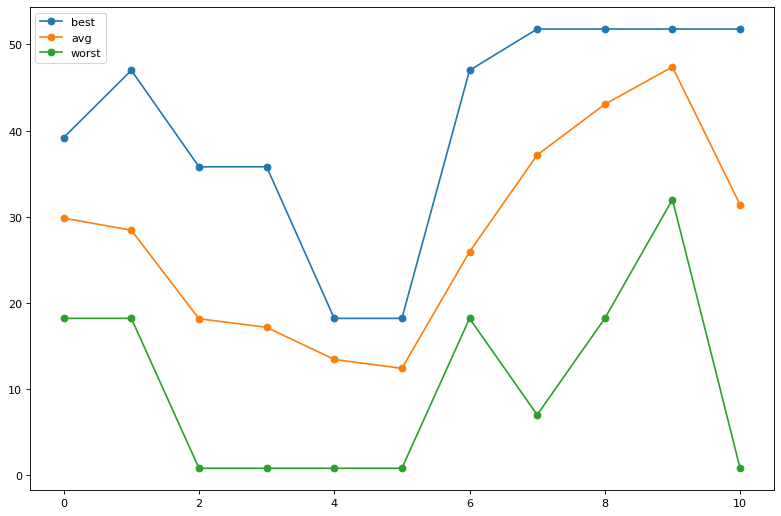

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8), dpi=80)
plt.plot([i for i in range(iter + 1)], best, "o-",label="best")
plt.plot([i for i in range(iter + 1)], avg, "o-",  label="avg")
plt.plot([i for i in range(iter + 1)], worst, "o-",  label="worst")
plt.legend(loc="best")
plt.show()